In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import os 

In [2]:
all_books = ['asoiaf-all-edges.csv', 'asoiaf-all-nodes.csv']
li = []
for f in all_books:
    tmp = pd.read_csv(f)
    li.append(tmp)

In [4]:
df = pd.concat(li, axis=0, ignore_index=True) #합치기
df = df[['Source', 'Target']] #source, target 컬럼만 남기기
df.drop_duplicates(subset=['Source', 'Target'], inplace=True) #겹치는 데이터 삭제 

G = nx.from_pandas_edgelist(df,  source='Source', target='Target')

print(len(G.nodes())) #797
print(len(G.edges())) #2824

797
2824


In [7]:
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Jon-Snow', 0.19163690707127468),
 ('Tyrion-Lannister', 0.16178358079473507),
 ('Daenerys-Targaryen', 0.11812048645122798),
 ('Theon-Greyjoy', 0.11100371180773067),
 ('Stannis-Baratheon', 0.10986282012240671)]

In [8]:
# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]


[('Tyrion-Lannister', 0.15326633165829145),
 ('Jon-Snow', 0.14321608040201006),
 ('Jaime-Lannister', 0.12688442211055276),
 ('Cersei-Lannister', 0.12185929648241206),
 ('Stannis-Baratheon', 0.11180904522613065)]

In [9]:
# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Jon-Snow', 0.01897573039129136),
 ('Tyrion-Lannister', 0.018318219780390946),
 ('Jaime-Lannister', 0.015418077911657122),
 ('Stannis-Baratheon', 0.01363168554808615),
 ('Arya-Stark', 0.013415196852853304)]

In [10]:
# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Tyrion-Lannister', 0.47573472515362913),
 ('Robert-Baratheon', 0.4586951220574275),
 ('Eddard-Stark', 0.4552759497026417),
 ('Cersei-Lannister', 0.45397441754225676),
 ('Jaime-Lannister', 0.4513935510411638)]

analyzing graphPermalink
이제 그래프를 어떻게 만드는지 알겠고, 필요하다면 이미 그래프를 만들어주는 걸 써서 만들면 될것 같으니, 이제 분석을 해보자.
degree: 각 node에 연결된 edge의 수
centrality: 어떤 노드가 중요한가?
degree_centrality: (normalized) degree, 해당 네트워크에서 직접적인 영향력을 가진 노드.
closeness_centrality: 해당 노드가 다른 노드들과 얼마나 가깝게 연결되어 있는가?
betweenness_centrality: 해당 노드가 다른 노드들의 최단 거리에 얼마나 많이 포함되어 있는가?

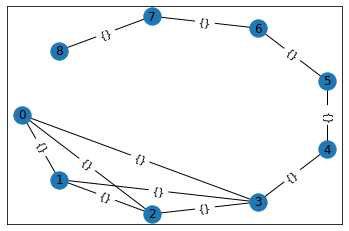

In [13]:
# 시작적으로 보여줘야 하는 것이 많아서, 그릠 그려주는 펑션을 따로 만듬 
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# matplotlib의 경우 networkx에서 그림을 그릴 때 필요하기 때문에 일단 넣어줌 

head_url = "/assets/images/markdown_img/"

def draw_graph(input_G, layout="shell"):
    if layout=="shell":
        pos = nx.shell_layout(input_G)
    elif layout=="spring":
        pos = nx.spring_layout(input_G)
    elif layout=="spectral":
        pos = nx.spectral_layout(input_G)
    elif layout=="circular":
        pos = nx.circular_layout(input_G)
    elif layout=="random":
        pos = nx.random_layout(input_G)
    else:
        pos = nx.shell_layout(input_G)
        
    plt.figure()
    nx.draw_networkx_nodes(input_G, pos)
    nx.draw_networkx_edges(input_G, pos)
    nx.draw_networkx_labels(input_G, pos)
    nx.draw_networkx_edge_labels(input_G, pos)
    #plt.axis("off")
G = nx.lollipop_graph(4, 5)
draw_graph(G)

In [14]:
import pandas as pd
import collections 

node_dict={
    "degree":dict(G.degree()), 
    "degree_centrality":nx.degree_centrality(G),
    "closeness_centrality":nx.closeness_centrality(G), 
    "betweenness_centrality":nx.betweenness_centrality(G), 
    "pagerank":nx.pagerank(G) 
}
pd.DataFrame(node_dict)

,degree,degree_centrality,closeness_centrality,betweenness_centrality,pagerank
0,3,0.375,0.347826,0.000000,0.113494
1,3,0.375,0.347826,0.000000,0.113494
2,3,0.375,0.347826,0.000000,0.113494
3,4,0.500,0.444444,0.535714,0.153007
4,2,0.250,0.470588,0.571429,0.093813
5,2,0.250,0.444444,0.535714,0.105018
6,2,0.250,0.380952,0.428571,0.114071
7,2,0.250,0.307692,0.250000,0.124171
8,1,0.125,0.242424,0.000000,0.069439
